# Generate a world-wide grid, and the features for each point

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jusipy

In [4]:
A_country = jusipy.latlong_features.All()
GLCF = A_features._datasets[2]
CLL = jusipy.GIS.CountryLatLong()

Loading GLCF(8km)                                                                                                     reas)                                                                                                    

/Users/thiesgehrmann/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (3,17,25,26,28,34,35,37,39,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Generate the grid

In [5]:
def make_grid(lat_scale):

    # Generate the grid
    land_grid = pd.DataFrame(jusipy.GIS.sample.grid_latlong(land=True, glcf=GLCF, lat_points=lat_scale),
                             columns=['lat', 'long'])

    # Attach the country in which the point lies
    land_grid_countries = CLL.get(list(land_grid.values))
    land_grid['country'] = land_grid_countries

    # Remove points without a country
    land_grid_wrong = land_grid[pd.isna(land_grid.country)]
    land_grid = land_grid[~pd.isna(land_grid.country)]
    return land_grid
#edef

In [6]:
grids = {}
for scale in [ 500 ]:
    print(scale)
    grids[scale] = make_grid(scale)
    grids[scale].to_pickle('data/grid_%d.pkl' % scale)
#efor

500


## Collect the features

In [8]:
# Load features
#A_latlong = jusipy.latlong_features.All()
#A_country = jusipy.country_features.All()

A_latlong = A_features
# Get features for each point in grid
#latlong_features = jusipy.country_features.get(land_grid, A_country, fuzzy=50)
latlong_features = jusipy.latlong_features.get(grids[500], A_latlong, pixel_window=10)

# Remove features we can't use...
#latlong_features = latlong_features.drop(columns=['coding_error_do_not_use_feature'])

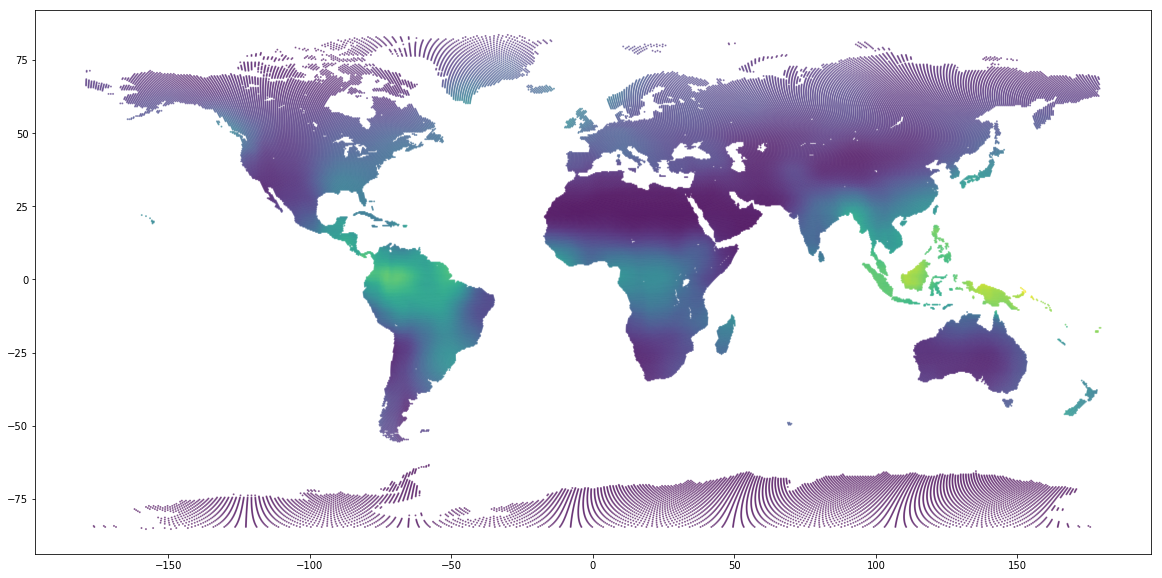

In [12]:
plt.figure(figsize=(20,10))


plt.scatter(grids[500].long, grids[500].lat, s=1, c=latlong_features.rain.values, alpha=0.5)
#plt.colorbar(cb)
#plt.xlim([-10,20])
#plt.ylim([30,60])

## Store the grid and features

In [13]:
# Store the grid
#land_grid.to_pickle('data/grid_500.pkl')
# Store the features
latlong_features.to_pickle('data/grid_500_latlong_features.pkl')

In [9]:
latlong_features

,nearest_airport,nearest_port,nearest_roads,nearest_railroad,nearest_urban_area,Water,Broadleaf Evergreen Forest,Coniferous Evergreen Forest and Woodland,High latitude Deciduous Forest and Woodland,Tundra,...,Grassland2,Cropland,Bare Ground2,Permanent snow and ice,coding_error_do_not_use_feature,distance_to_mine,rain,cloud,temp,pet
index,,,,,,,,,,,,,,,,,,,,,
476,2.269985,2.417112,3.186856,3.256921,3.274081,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,2.514181,0.000000,0.000000,0.000000,0.000000
478,2.300315,2.398954,2.901394,2.968651,2.987310,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,2.492735,0.000000,0.000000,0.000000,0.000000
556,2.490059,2.661822,3.568372,3.646451,3.664967,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,2.769422,0.000000,0.000000,0.000000,0.000000
557,2.495916,2.643225,3.420695,3.497488,3.516714,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,2.749504,0.000000,0.000000,0.000000,0.000000
558,2.511976,2.634238,3.274179,3.349547,3.369538,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,2.738808,0.000000,0.000000,0.000000,0.000000
559,2.538045,2.634958,3.128989,3.202768,3.223588,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,2.737443,0.000000,0.000000,0.000000,0.000000
560,2.573819,2.645377,2.985115,3.057321,3.079038,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,2.745421,0.000000,0.000000,0.000000,0.000000
638,2.712180,3.019511,4.526041,4.665120,4.598867,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,3.208266,0.000000,0.000000,0.000000,0.000000
639,2.714437,3.011203,4.419900,4.509361,4.527404,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,3.151852,0.000000,0.000000,0.000000,0.000000
